# Handwritten Digit Recognition using CNN (MNIST Dataset)

In [ ]:
# %pip install --upgrade pip
# % python --version

### Importing the libraries

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.14.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train)


In [ ]:
train_datagen = ImageDataGenerator(
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_datagen.fit(x_train)


## Part 2 - Building the CNN

In [ ]:
def create_cnn_model(opt='adam', k_size = 3, p_size = 2):
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = k_size, activation='relu', input_shape=[28,28,1]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = p_size, strides=2))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = k_size, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = p_size, strides=2))
    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return cnn


### Hperparameter tuning

In [ ]:
!pip install  scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

cnn_model = KerasClassifier(model=create_cnn_model, epochs=10, batch_size=32, verbose=1)

param_grid = {
    'optimizer': ['adam', 'sgd'],
    'model__k_size': [ 3,  5],

    'model__p_size': [ 2,  3]
}

grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, return_train_score=True)

grid_search_result = grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search_result.best_params_)


Epoch 1/10
1250/1250 [==============================] - 52s 40ms/step - loss: 0.2415 - accuracy: 0.9244
Epoch 2/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.0677 - accuracy: 0.9785
Epoch 3/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.0453 - accuracy: 0.9861
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.0342 - accuracy: 0.9888
Epoch 5/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 7/10
1250/1250 [==============================] - 32s 25ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 8/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 9/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0141 - accuracy: 0.9952
Epoch 10/10
1250/1250 [==============================] - 10s 8ms

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:

augmented_data = train_datagen.flow(x_train, y_train, batch_size=32)
opt='sgd'
k_size = 5
p_size = 3

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = k_size, activation='relu', input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = p_size, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = k_size, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = p_size, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
cnn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x=augmented_data , validation_data=(x_test, y_test), epochs=20)


Epoch 1/20
1875/1875 [==============================] - 79s 41ms/step - loss: 0.9018 - accuracy: 0.7009 - val_loss: 0.3130 - val_accuracy: 0.8923
Epoch 2/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2812 - accuracy: 0.9103 - val_loss: 0.2082 - val_accuracy: 0.9335
Epoch 3/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1918 - accuracy: 0.9394 - val_loss: 0.1340 - val_accuracy: 0.9569
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1507 - accuracy: 0.9523 - val_loss: 0.1342 - val_accuracy: 0.9553
Epoch 5/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1304 - accuracy: 0.9588 - val_loss: 0.1121 - val_accuracy: 0.9640
Epoch 6/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1124 - accuracy: 0.9641 - val_loss: 0.0814 - val_accuracy: 0.9745
Epoch 7/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1000 - accuracy: 0.9678 - val_loss: 0.0724 -

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image

result = cnn.predict(x_test[0])


if result[0][0] == 1:
  prediction="zero"
elif result[0][1] == 1:
  prediction = 'one'
elif result[0][2] == 1:
  prediction = 'two'
elif result[0][3] == 1:
  prediction = 'three'
elif result[0][4] == 1:
  prediction = 'four'
elif result[0][5] == 1:
  prediction = 'five'
elif result[0][6] == 1:
  prediction = 'six'
elif result[0][7] == 1:
  prediction = 'seven'
elif result[0][8] == 1:
  prediction = 'eight'
elif result[0][9] == 1:
  prediction = 'nine'

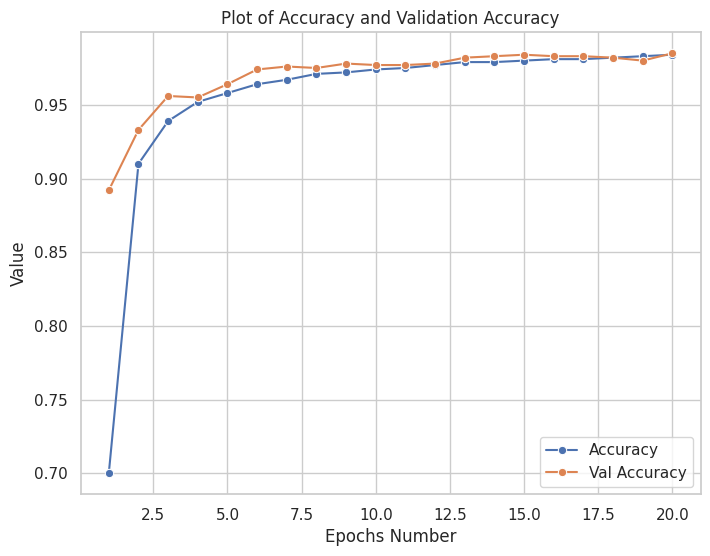

In [ ]:

import matplotlib.pyplot as plt
accuracy=[0.7, 0.91, 0.939, 0.952, 0.958, 0.964, 0.967, 0.971, 0.972, 0.974, 0.975, 0.977, 0.979, 0.979, 0.98, 0.981, 0.981, 0.982, 0.983, 0.984]
val_accuracy=[0.892, 0.933, 0.956, 0.955, 0.964, 0.974, 0.976, 0.975, 0.978, 0.977, 0.977, 0.978, 0.982, 0.983, 0.984, 0.983, 0.983, 0.982, 0.98, 0.985]
import seaborn as sns
# import matplotlib.pyplot as plt

# Example arrays
array1 = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# array2 = [2, 4, 6, 8, 10]

# Create a list of indices for the x-axis
# indices = list(range(len(array1)))

# Create a Seaborn line plot
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Plot the continuous line
sns.lineplot(x=array1, y=accuracy, label='Accuracy', marker='o')  # Plot array1
sns.lineplot(x=array1, y=val_accuracy, label='Val Accuracy', marker='o')  # Plot array2

# Set labels and title
plt.xlabel('Epochs Number')
plt.ylabel('Value')
plt.title('Plot of Accuracy and Validation Accuracy')

# Show legend
plt.legend()

# Show the plot
plt.show()
